In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from functions import *

In [2]:
freedom_df = pd.read_csv("Data/hfi_cc_2019.csv")[['year', 'hf_score', 'pf_rol', 
                                                  'pf_ss', 'pf_movement','pf_religion', 
                                                  'pf_association', 'pf_expression', 
                                                  'pf_identity', 'ef_government', 'ef_legal', 
                                                  'ef_money', 'ef_trade', 'ef_trade_regulatory']]

countries_regions_df = pd.read_csv("Data/hfi_cc_2019.csv")[["year", "countries", "region"]]

freedom_df.head()

,year,hf_score,pf_rol,pf_ss,pf_movement,pf_religion,pf_association,pf_expression,pf_identity,ef_government,ef_legal,ef_money,ef_trade,ef_trade_regulatory
0,2017,7.84,5.3,9.3,10,9.2,10,8.6,5.8,7.5,5.1,9.6,8.3,7.7
1,2017,4.99,3.8,7.8,5.8,4.9,5,7.3,0,3.6,4.7,7.3,2.8,2.6
2,2017,5.4,3.4,8.1,6.7,8.8,4,6.5,5,6.8,3,5.6,3.2,3.7
3,2017,6.86,5.7,8.8,10,7.8,7.5,8.7,10,5.7,4,6.5,6.5,4.9
4,2017,7.42,4.9,9.1,8.3,6.2,6.5,7.2,8.2,7.4,5.9,9.5,8.2,7.4


In [3]:
countries_regions_df.head()

,year,countries,region
0,2017,Albania,Eastern Europe
1,2017,Algeria,Middle East & North Africa
2,2017,Angola,Sub-Saharan Africa
3,2017,Argentina,Latin America & the Caribbean
4,2017,Armenia,Caucasus & Central Asia


### Cleaning Data

In [4]:
"""
Every column consist of 
objects.
"""
freedom_df.dtypes

year                    int64
hf_score               object
pf_rol                 object
pf_ss                  object
pf_movement            object
pf_religion            object
pf_association         object
pf_expression          object
pf_identity            object
ef_government          object
ef_legal               object
ef_money               object
ef_trade               object
ef_trade_regulatory    object
dtype: object

### Separting by years of 2010 and 2017

In [5]:
# Selecting desired year
def year(df, year):
    """
    Able to select rows with
    desired year
    """
    return df.loc[df["year"] == year]

freedom_2017 = year(freedom_df, 2017)
freedom_2010 = year(freedom_df, 2010)

In [6]:
freedom_df.shape

(1620, 14)

Missing values in this dataset are filled with a dash(-)

In [7]:
# Finding rows with missing values
missing_values = freedom_2017.loc[freedom_2017.pf_association == "-"]  # All nulls are located in pf_association column
len(missing_values)  # 26/162 16.04% of our data is cut out

26

In [8]:
# Dropping missing values
freedom_2017 = freedom_2017.drop(index=missing_values.index)

In [9]:
freedom_2017.shape

(136, 14)

In [10]:
# Replacing missing data with a numpy NaN
def replace_missing_to_na(df):
    for strings in df.values:
        df.replace("-", np.NaN, inplace=True)

In [11]:
replace_missing_to_na(freedom_2017)

In [12]:
freedom_2017.isna().sum()

year                   0
hf_score               0
pf_rol                 0
pf_ss                  0
pf_movement            0
pf_religion            0
pf_association         0
pf_expression          0
pf_identity            0
ef_government          0
ef_legal               0
ef_money               0
ef_trade               0
ef_trade_regulatory    0
dtype: int64

### Change data types

In [13]:
# Changing all objects to floats
# freedom_df = freedom_df.hf_score.astype(float)
# freedom_df = freedom_df.pf_rol.astype(float)
# freedom_df = freedom_df.pf_ss.astype(float)
# freedom_df = freedom_df.pf_movement.astype(float)
# freedom_df = freedom_df.pf_religion.astype(float)
# freedom_df = freedom_df.pf_association.astype(float)
# freedom_df = freedom_df.pf_expression.astype(float)
# freedom_df = freedom_df.pf_identity.astype(float)
# freedom_df = freedom_df.ef_government.astype(float)
# freedom_df = freedom_df.ef_money.astype(float)
# freedom_df = freedom_df.ef_trade.astype(float)
# freedom_df = freedom_df.ef_trade_regulatory.astype(float)

In [14]:
freedom_2017.dtypes

year                    int64
hf_score               object
pf_rol                 object
pf_ss                  object
pf_movement            object
pf_religion            object
pf_association         object
pf_expression          object
pf_identity            object
ef_government          object
ef_legal               object
ef_money               object
ef_trade               object
ef_trade_regulatory    object
dtype: object

In [18]:
# Chaning data type to a float
freedom_2017 = freedom_2017.astype(float)

### Removing outliers

Removing outliers will help the regression model with accuracy

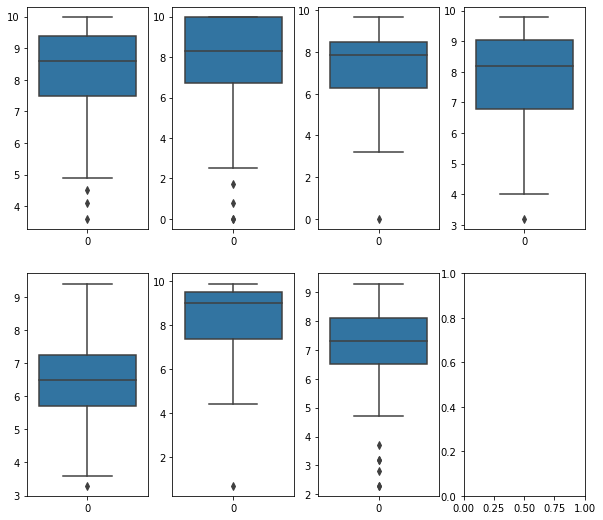

In [19]:
# Creating subplots to plot the outliers in the dataframe
# Everything is in order from left to right

fig, ax = plt.subplots(2, 4, figsize=(10, 9))
sns.boxplot(data=freedom_2017.pf_ss, ax=ax[0][0])
sns.boxplot(data=freedom_2017.pf_movement, ax=ax[0][1])
sns.boxplot(data=freedom_2017.pf_religion, ax=ax[0][2])
sns.boxplot(data=freedom_2017.pf_expression, ax=ax[0][3])
sns.boxplot(data=freedom_2017.ef_government, ax=ax[1][0])
sns.boxplot(data=freedom_2017.ef_money, ax=ax[1][1])
sns.boxplot(data=freedom_2017.ef_trade, ax=ax[1][2])

# Do Not Run These Cells

You can remove the outliers from the first, second and last because those have the most outliers

In [20]:
# Removing outliers in pf_ss
"""
There are 3 outliers
that are lower than the
min value of 4.9 or 5
"""
freedom_2017.pf_ss.unique()  # Looking at all of the values

# pf_ss values have to be than 4.8
freedom_2017 = freedom_2017.loc[freedom_2017.pf_ss > 4.8]

In [ ]:
# Removing outliers in pf_movement
"""
There are 3 outliers
that are lower than the
min of 2.3
"""
freedom_2017.pf_movement.unique()

freedom_2017 = freedom_2017.loc[freedom_2017.pf_movement > 2]

In [ ]:
# Removing outliers from pf_religion
"""
There is 1 outlier
that is below the min
of 3
"""
freedom_2017.pf_religion.unique()

freedom_2017 = freedom_2017.loc[freedom_2017.pf_religion > 5.5]

In [ ]:
# Removing outliers from pf_expression
"""
There is 1 outlier
that is below the min
value of 3.5
"""
freedom_2017.pf_expression.unique()

freedom_2017 = freedom_2017.loc[freedom_2017.pf_expression > 5]

In [ ]:
# Removing outliers from ef_government
"""
There is 1 outlier
that is below the min
value of 3.5
"""
freedom_2017.ef_government.values.min()  # lowest value is 3.6

freedom_2017 = freedom_2017.loc[freedom_2017.ef_government > 3.6]

In [ ]:
# Removing outliers from ef_money
"""
There is 1 outlier
that is below the min value
of 4.3
"""
freedom_2017 = freedom_2017.loc[freedom_2017.ef_money > 5.9]

In [ ]:
# Removing outliers from ef_trade
"""
There are 4 outliers
that are below the min
value of 4.6
"""
freedom_2017.ef_trade.unique()

freedom_2017 = freedom_2017.loc[freedom_2017.ef_trade > 4]

In [ ]:
# Function that gets rid of outliers in the data
def outliers():
    freedom_2017 = freedom_2017.loc[freedom_2017.pf_ss > 4.8]
    freedom_2017 = freedom_2017.loc[freedom_2017.pf_movement > 2]
    freedom_2017 = freedom_2017.loc[freedom_2017.pf_religion > 0]
    freedom_2017 = freedom_2017.loc[freedom_2017.pf_expression > 3.2]
    freedom_2017 = freedom_2017.loc[freedom_2017.ef_government > 3.6]
    freedom_2017 = freedom_2017.loc[freedom_2017.ef_money > 2]
    freedom_2017 = freedom_2017.loc[freedom_2017.ef_trade > 4]

In [ ]:
freedom_2017.shape

In [ ]:
# Replacing missing data with a numpy NaN
def replace_missing_to_na(df):
    for strings in df.values:
        df.replace("-", np.NaN, inplace=True)